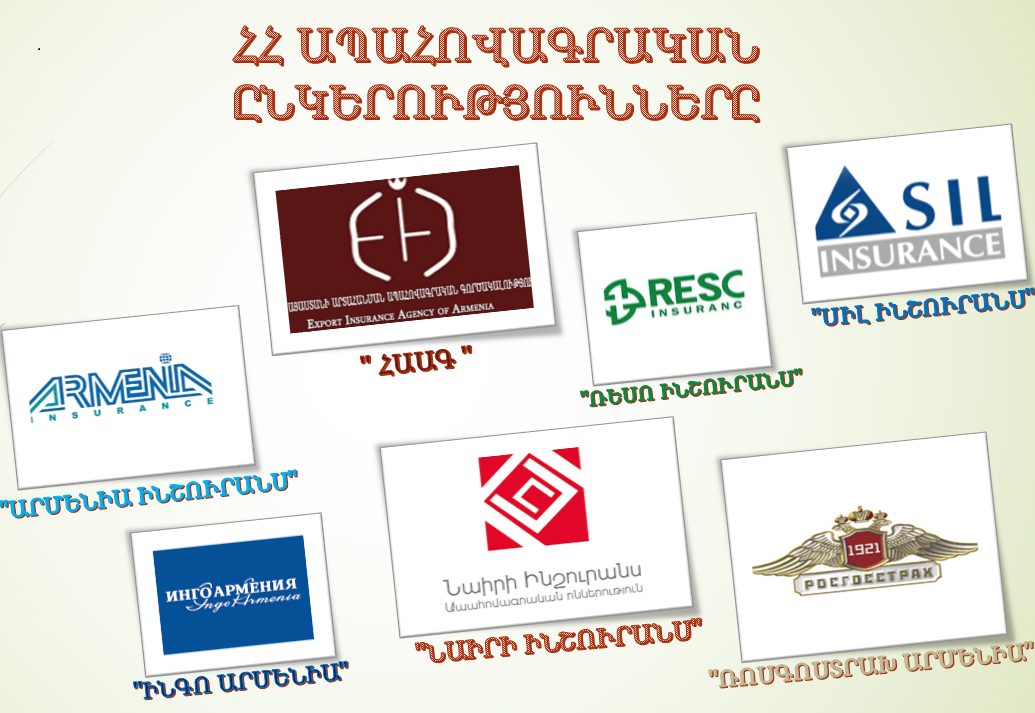

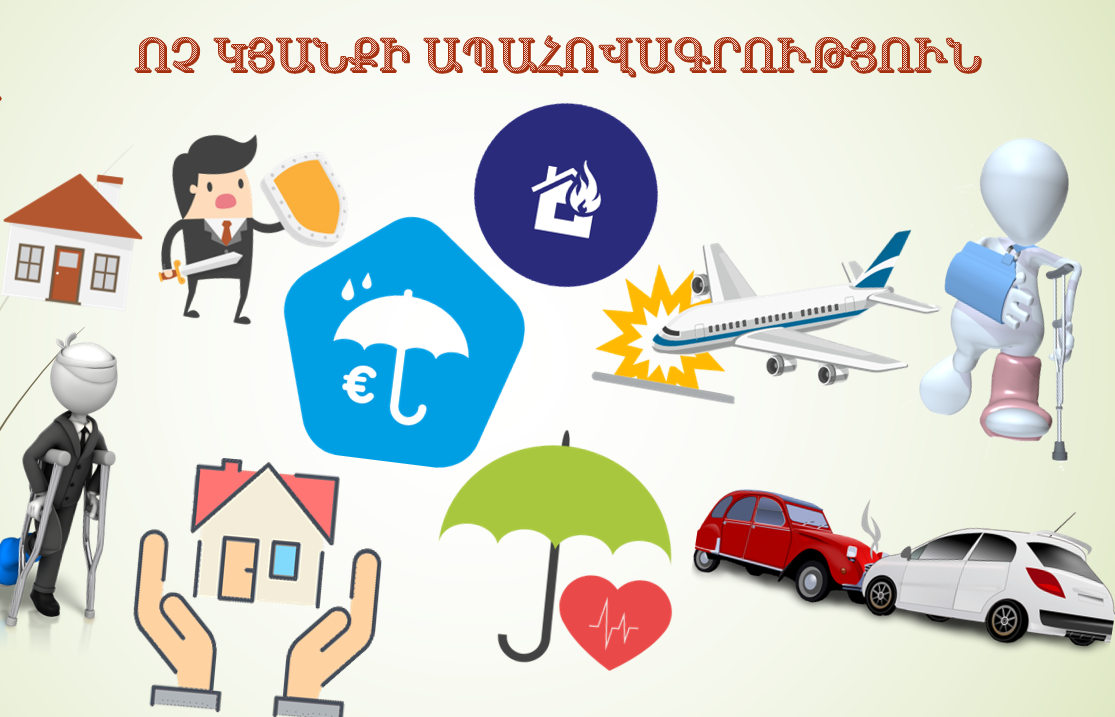

<h1 align="center">Insurance in Armenia</h1>
<h1 align="center">Artur Avagyan</h1>
<h1 align="center">Final project</h1>

### Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
# sns.set_palette("Wistia")
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Read fisrt sheet of insurance data

In [2]:
data_insurance_1=pd.read_excel('data_insurance.xlsx',sheet_name='Ցուցանիշ 2011_2020')

### Bar chart by company and animation during year

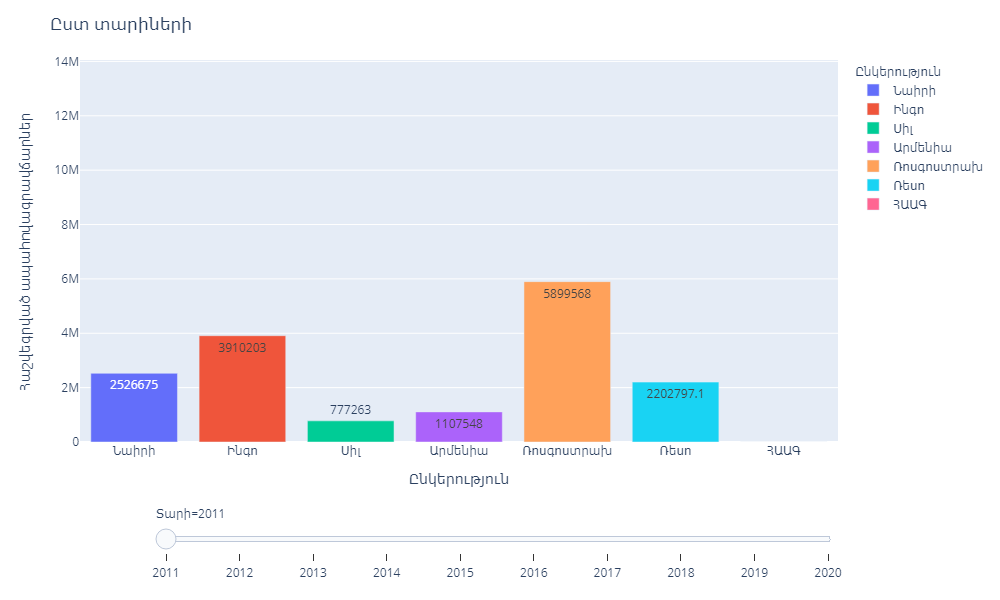

In [3]:
fig = px.bar(
    data_insurance_1,
    x="Ընկերություն",
    y="Հաշվեգրված ապահովագրավճարներ",
    animation_frame="Տարի",
    animation_group="Ընկերություն",
    color="Ընկերություն",
    hover_name="Ընկերություն",
    text=round(data_insurance_1["Հաշվեգրված ապահովագրավճարներ"],2),
    range_y=[0,data_insurance_1['Հաշվեգրված ապահովագրավճարներ'].max()]
)

fig["layout"].pop("updatemenus")
fig.update_layout(
    title_text='Ըստ տարիների'
)
fig.show(renderer="png", width=1000, height=600)

### Stack bar chart by company during years

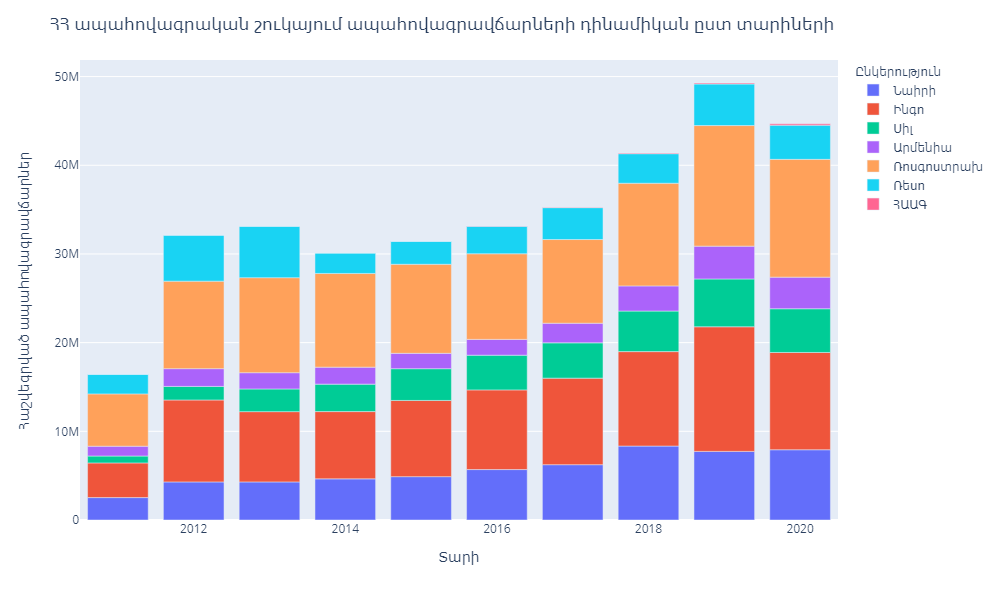

In [4]:
fig = px.bar(data_insurance_1,
             x="Տարի",
             y="Հաշվեգրված ապահովագրավճարներ",
             color='Ընկերություն'
            )
fig.update_layout({'title' : 'ՀՀ ապահովագրական շուկայում ապահովագրավճարների դինամիկան ըստ տարիների'}
                 )
fig.show(renderer="png", width=1000, height=600)

### Dynamics of insurance premiums and compensations

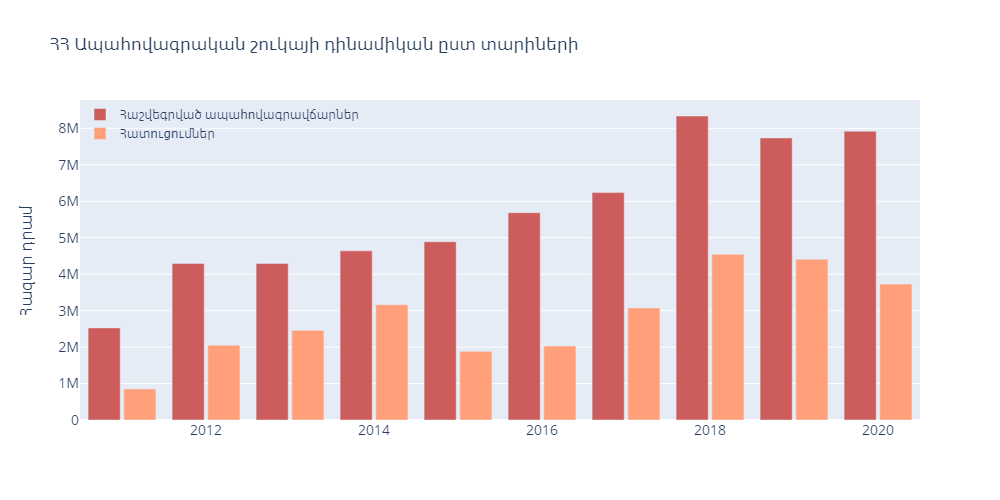

In [5]:
year=list(np.arange(data_insurance_1['Տարի'].min(),
     data_insurance_1['Տարի'].max()+1))

fig = go.Figure()
fig.add_trace(go.Bar(
    x=year,
    y=data_insurance_1['Հաշվեգրված ապահովագրավճարներ'],
    name='Հաշվեգրված ապահովագրավճարներ',
    text='Հաշվեգրված ապահովագրավճարներ',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=year,
    y=data_insurance_1['Հատուցումներ'],
    name='Հատուցումներ',
    text='Հատուցումներ',
    marker_color='lightsalmon'
))

fig.update_layout(
    title='ՀՀ Ապահովագրական շուկայի դինամիկան ըստ տարիների',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Հազար դրամ',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15,
    bargroupgap=0.1
)
fig.show(renderer="png", width=1000, height=500)

### Pie chart by company premiums during last 3 years

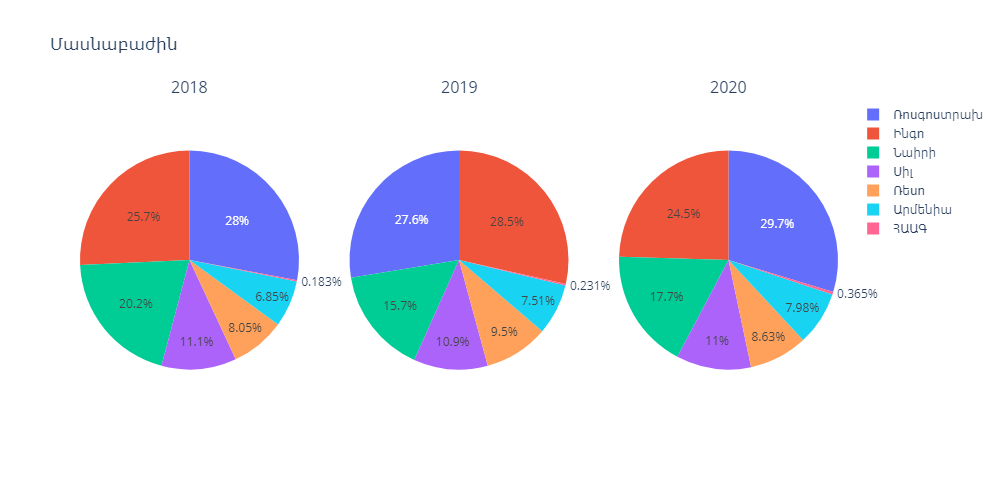

In [6]:
fig = make_subplots(1, 3, specs=[[{'type':'domain'},{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=['2018','2019', '2020'])
fig.add_trace(go.Pie(labels=data_insurance_1[data_insurance_1['Տարի']==2018]['Ընկերություն'].unique(),
                     values=data_insurance_1[data_insurance_1['Տարի']==2018]['Հաշվեգրված ապահովագրավճարներ'],
                    ), 1, 1)

fig.add_trace(go.Pie(labels=data_insurance_1[data_insurance_1['Տարի']==2019]['Ընկերություն'].unique(),
                     values=data_insurance_1[data_insurance_1['Տարի']==2019]['Հաշվեգրված ապահովագրավճարներ'],
                    ), 1, 2)

fig.add_trace(go.Pie(labels=data_insurance_1[data_insurance_1['Տարի']==2020]['Ընկերություն'].unique(),
                     values=data_insurance_1[data_insurance_1['Տարի']==2020]['Հաշվեգրված ապահովագրավճարներ'],
                    ), 1, 3)

fig.update_layout(title_text='Մասնաբաժին')
fig.show(renderer="png", width=1000, height=500)

### Profit dynamics with line charts by company during years

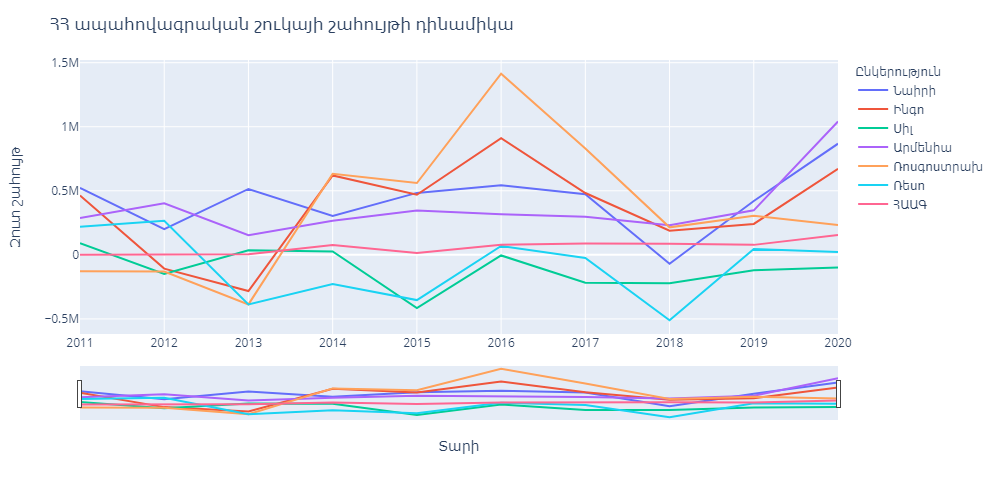

In [7]:
fig = px.line(data_insurance_1, x="Տարի", y="Զուտ շահույթ", color="Ընկերություն",
              hover_name="Ընկերություն")
fig.update_layout(title_text='ՀՀ ապահովագրական շուկայի շահույթի դինամիկա')
fig.update_xaxes(rangeslider_visible=True)
fig.show(renderer="png", width=1000, height=500)

### Relationshep between premiums and compensation by company

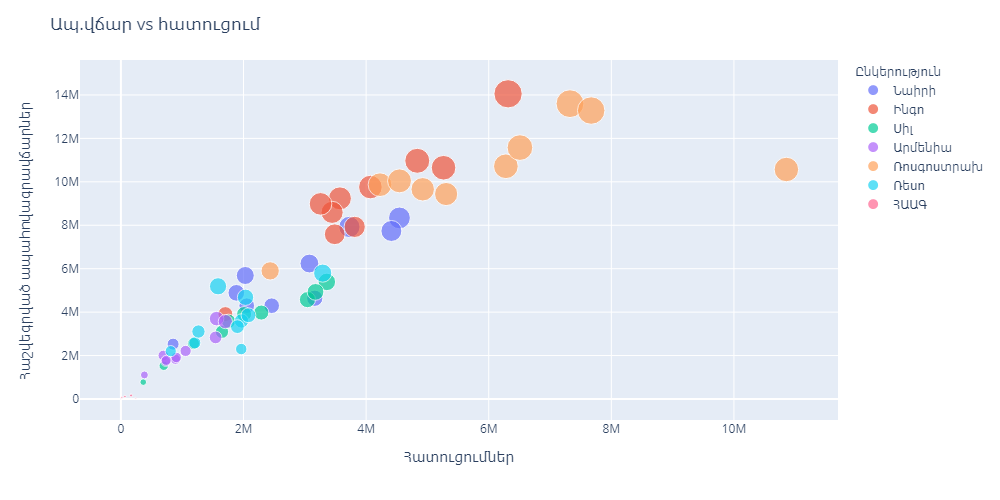

In [8]:
fig = px.scatter(data_insurance_1, x="Հատուցումներ", y="Հաշվեգրված ապահովագրավճարներ", color="Ընկերություն",
                 size='Հաշվեգրված ապահովագրավճարներ', 
                 hover_data=['Տարի']
                )
fig.update_layout(title_text='Ապ.վճար vs հատուցում')
fig.show(renderer="png", width=1000, height=500)

In [9]:
data_insurance_1['Ծախս/ապ.վճար']=data_insurance_1['Ընդհանուր ծախսեր']/data_insurance_1['Հաշվեգրված ապահովագրավճարներ']

### Boxplot of cost/premium by company

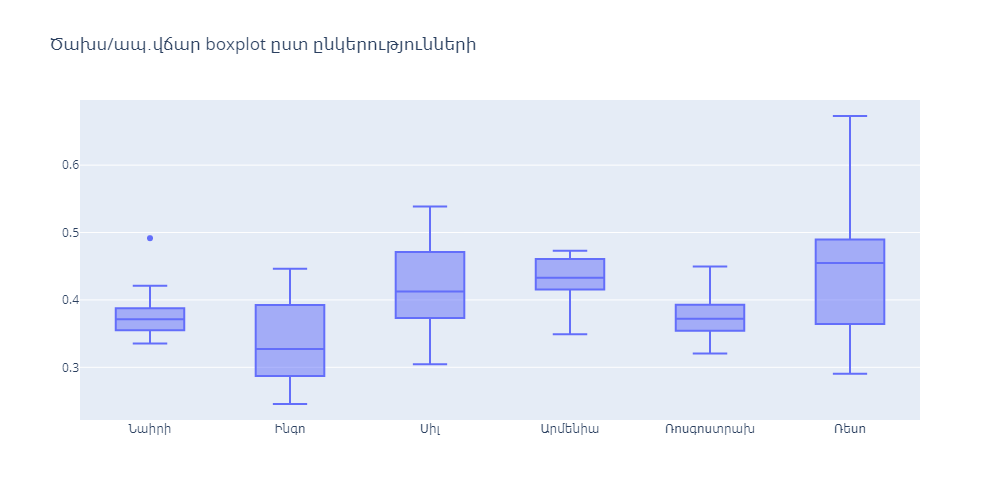

In [10]:
fig = go.Figure(
    go.Box(
        y=data_insurance_1[data_insurance_1['Ընկերություն']!='ՀԱԱԳ']['Ծախս/ապ.վճար'],
        x=data_insurance_1[data_insurance_1['Ընկերություն']!='ՀԱԱԳ']['Ընկերություն']
    )
)
fig.update_layout(title_text='Ծախս/ապ․վճար boxplot ըստ ընկերությունների')
fig.show(renderer="png", width=1000, height=500)

### Read second sheet of insurance data

In [11]:
data_insurance_2=pd.read_excel('data_insurance.xlsx',sheet_name='Ամփոփ')

### Distributions premiums by company

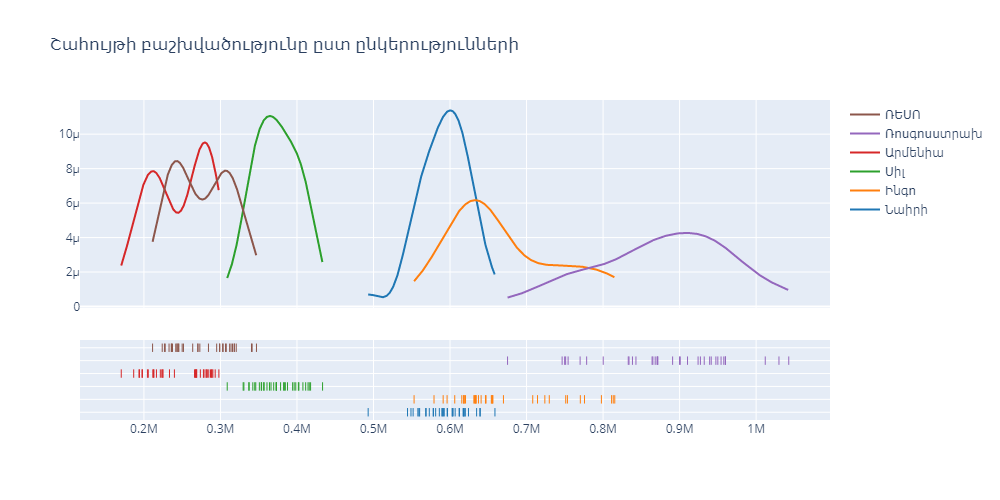

In [12]:
hist_data=[]
group_labels=[]
data_without_HAAG=data_insurance_2[data_insurance_2['Ընկերություն']!='ՀԱԱԳ']
for i in data_without_HAAG['Ընկերություն'].unique():
    hist_data.append(data_without_HAAG[data_without_HAAG['Ընկերություն']==i]['Վաստակած ապահովագրավճարներ'])
    group_labels.append(i)

fig = ff.create_distplot(hist_data,
                         group_labels,
                         show_curve=True,
                         show_hist=False
                        )

fig.update_layout(title_text='Շահույթի բաշխվածությունը ըստ ընկերությունների')
fig.show(renderer="png", width=1000, height=500)

### Parcoords of any columns and color by companies

In [13]:
dimensions=[]
for i in data_insurance_2.columns[3:]:
    dimensions.append(dict(label=i,
                           values=data_insurance_2[i]))
# dimensions

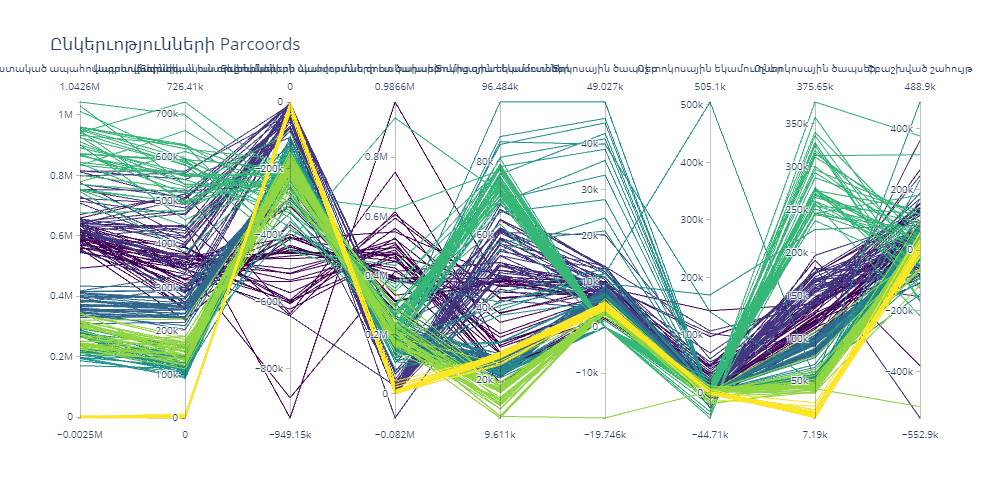

In [14]:
fig = go.Figure(data=
    go.Parcoords(
        line = dict(color = pd.factorize(data_insurance_2['Ընկերություն'])[0]
                   ),
        dimensions = dimensions
    )
)

fig.update_layout(
    title_text='Ընկերւոթյունների Parcoords',
    plot_bgcolor = 'white',
    paper_bgcolor = 'white'
)

fig.show(renderer="png", width=1000, height=500)

### 3D scatter plot by companies

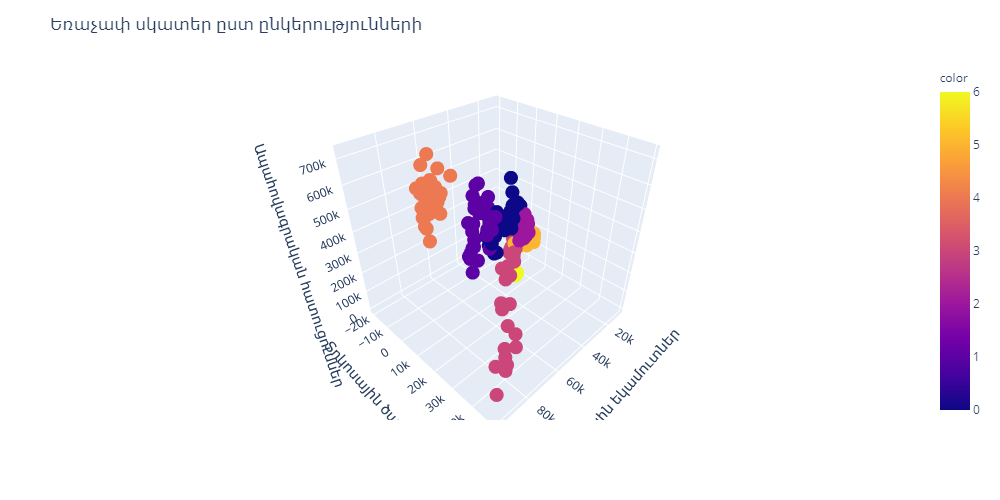

In [15]:
fig = px.scatter_3d(data_insurance_2,
                    x='Տոկոսային եկամուտներ',
                    y='Տոկոսային ծապսեր',
                    z='Ապահովագրական հատուցումներ',
                    color=pd.factorize(data_insurance_2['Ընկերություն'])[0])
fig.update_layout(
    title_text='Եռաչափ սկատեր ըստ ընկերությունների'
)
fig.show(renderer="png", width=1000, height=500)

### Read third sheet of insurance data

In [16]:
data_insurance_3=pd.read_excel('data_insurance.xlsx',sheet_name='Ըստ դասերի ապ_վճար')

### Groupby by 2 columns and aggregate by sum

In [17]:
data_3group=data_insurance_3.groupby(['Տարի','Ապ․դասի համար']).agg('sum').reset_index()

### Dynamics of Insurance class during years

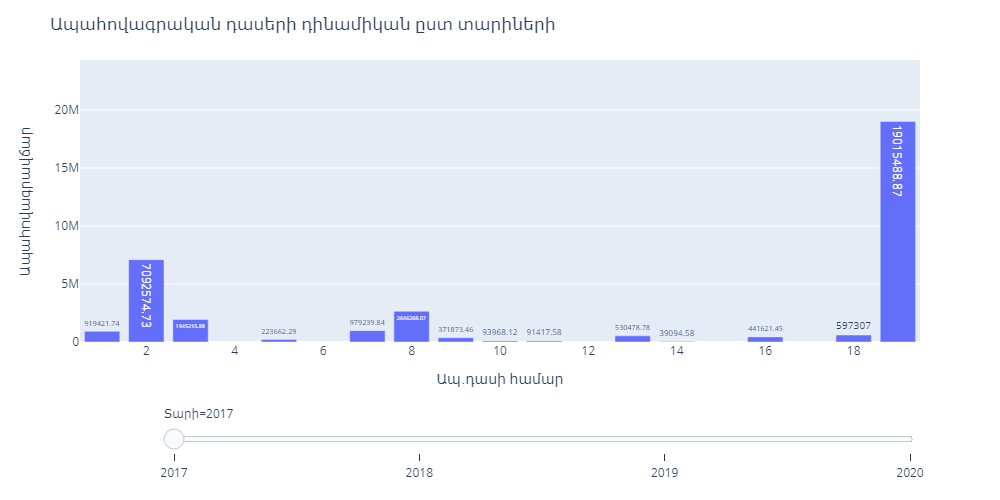

In [18]:
fig2 = px.bar(
    data_3group,
    x="Ապ․դասի համար",
    y="Ապահովագրավճար",
    animation_frame="Տարի",
    text=round(data_3group["Ապահովագրավճար"],2),
    range_y=[0,data_3group["Ապահովագրավճար"].max()]
)

fig2["layout"].pop("updatemenus")
fig2.update_layout(
    title_text='Ապահովագրական դասերի դինամիկան ըստ տարիների'
)
fig2.show(renderer="png", width=1000, height=500)

### Read fourth sheet of insurance data

In [19]:
data_insurance_4=pd.read_excel('data_insurance.xlsx',sheet_name='Շուկա_ստատ')

### Technical provision by company

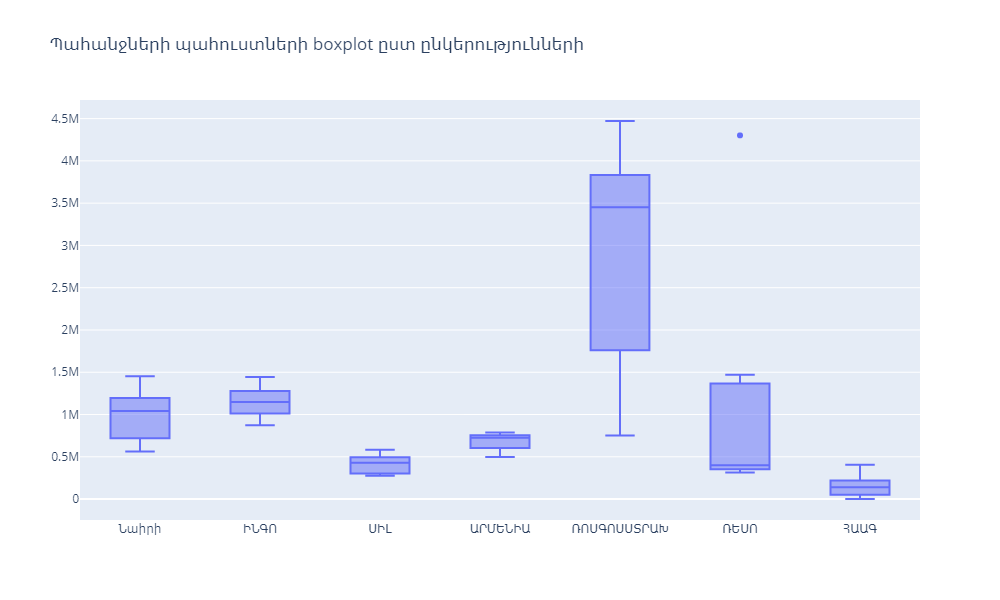

In [20]:
fig = go.Figure(
    go.Box(
        y=data_insurance_4['ՊՊ'],
        x=data_insurance_4['Ընկերություն'],
    )
)
fig.update_layout(title_text='Պահանջների պահուստների boxplot ըստ ընկերությունների')
fig.show(renderer="png", width=1000, height=600)

### Relationshep between some columns  colored by company

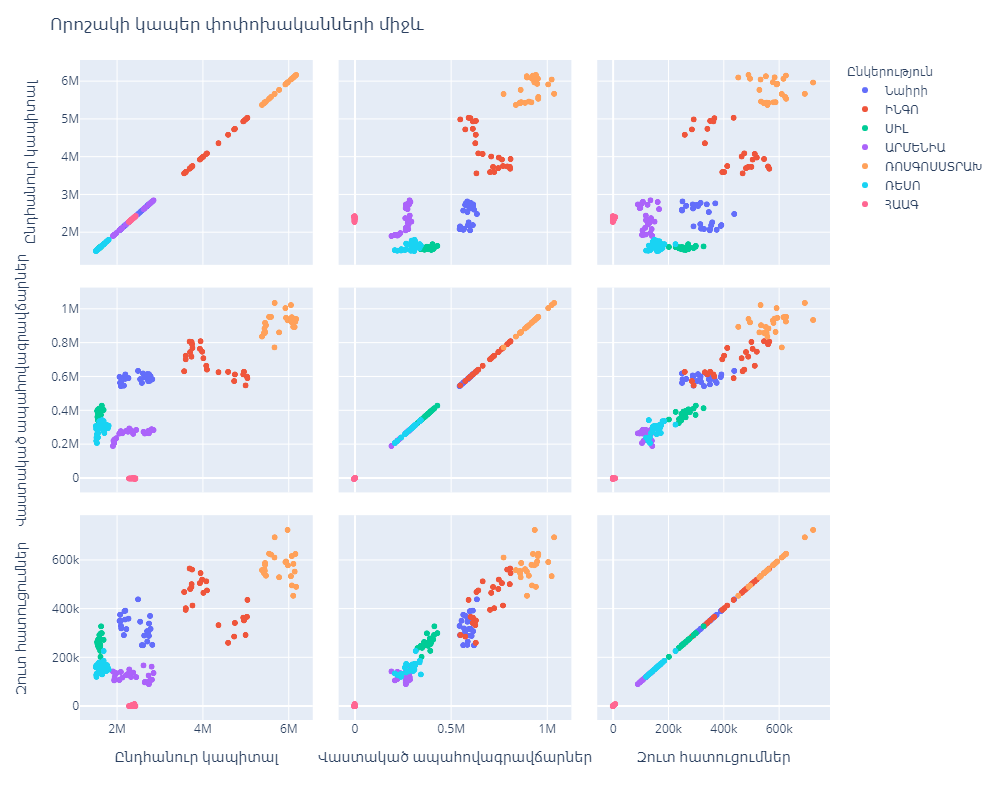

In [21]:
fig = px.scatter_matrix(data_insurance_4,
                        dimensions=data_insurance_4.columns[[3,6,8]], color="Ընկերություն",)
fig.update_layout(
    title_text='Որոշակի կապեր փոփոխականների միջև'
)
fig.show(renderer="png", width=1000, height=800)

# Best Regards

<h4 align="left">Artur Avagyan</h4>
    <ul>
    <li>Actuarial supervisor at Central Bank of Armenia</li>
    <li>Student from YSU (Data Science for Business Master's Degree Program)</li>
    <li>E-mail:   avagyan.artur97@gmail.com</li>
    <li>LinkedIn: <a href="https://www.linkedin.com/in/artur-avagyan-0a16311b3">Artur Avagyan</a></li>
    <li>GitHub:   <a href="https://github.com/artur-avagyan">Artur Avagyan</a></li>
    <li>Phone:    +37498641815</li>
    </ul>

<h3 align="center">YSU DSB 2020-2021</h3>